In [234]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [235]:
mnist = datasets.MNIST('./mnist_data', train=True, download=False)

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
train_data = TensorDataset(mnist.train_data.reshape(-1,28*28).float()/255, mnist.train_labels)
validation_data = TensorDataset(mnist.test_data.reshape(-1,28*28).float()/255, mnist.test_labels)
train_dl = DataLoader(train_data, batch_size=32)
validation_dl = DataLoader(validation_data, batch_size=32)

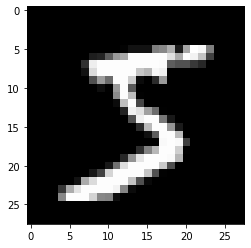

In [219]:
plt.imshow(mnist.test_data[0], cmap='gray')

In [236]:
train_dl.

TypeError: 'DataLoader' object does not support indexing

In [225]:
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

class simple_net(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(28*28, 10)
        self.act1 = nn.ReLU()
        self.lin2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.lin1(x)
        x = self.act1(x)
        x = self.lin2(x)
        return x

In [228]:
def get_model():
    model = simple_net()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    return model, optimizer

def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

tensor(25.2332, grad_fn=<NllLossBackward0>)

In [229]:
def loss_batch(model, loss_fn, xb, yb, opt=None):
    pred = model(xb)
    loss = loss_fn(pred, yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    return loss.item(), len(xb)

In [232]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train() # used by dropout and batchnorm
        losses = 0
        for xb, yb in train_dl:
            loss, _ = loss_batch(model, loss_fn, xb, yb, opt)
            losses += loss

        print(f'epoch {epoch+1}/{epochs} loss {losses/len(train_dl)}', end="")
        model.eval()
        with torch.no_grad():
            valid_loss = sum(loss_fn(model(xb), yb) for xb, yb in valid_dl) / len(valid_dl)
        print(f", {valid_loss}, {accuracy(model(x_train), y_train)}")

In [233]:
model, opt = get_model()
fit(5, model, F.cross_entropy, opt, train_dl, validation_dl)

epoch 1/5 loss 0.20230076092009744, 0.20050574839115143, 0.927049994468689
epoch 2/5 loss 0.2005070029338201, 0.19743826985359192, 0.926716685295105
epoch 3/5 loss 0.19838576158533494, 0.19595114886760712, 0.9265499711036682
epoch 4/5 loss 0.19700324638808767, 0.19485163688659668, 0.925599992275238
epoch 5/5 loss 0.1953099862014254, 0.1912238746881485, 0.9265333414077759
